In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/portfolio_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows and columns of the dataset
print(df.head())
print(df.columns)


       Date        AMZN        DPZ         BTC       NFLX
0  5/1/2013  248.229996  51.190983  106.250000  30.415714
1  5/2/2013  252.550003  51.987320   98.099998  30.641428
2  5/3/2013  258.049988  52.446388  112.900002  30.492857
3  5/6/2013  255.720001  53.205257  109.599998  30.098572
4  5/7/2013  257.730011  54.151505  113.199997  29.464285
Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')


In [2]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)


In [3]:
# Display basic information about the dataset
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Generate summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1520 entries, 2013-05-01 to 2019-05-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1520 non-null   float64
 1   DPZ     1520 non-null   float64
 2   BTC     1520 non-null   float64
 3   NFLX    1520 non-null   float64
dtypes: float64(4)
memory usage: 59.4 KB
Missing values:
 AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64
              AMZN          DPZ           BTC         NFLX
count  1520.000000  1520.000000   1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273
std     518.442653    72.192287   3310.894199   107.641486
min     248.229996    51.190983     69.660004    29.464285
25%     364.360001    84.993593    340.904999    62.851071
50%     686.459992   127.168053    625.304993   104.000000
75%    1121.287536   202.454994   3874.912415   192.207496
max    2039.510010   298.635986  18972.320310   418.970001


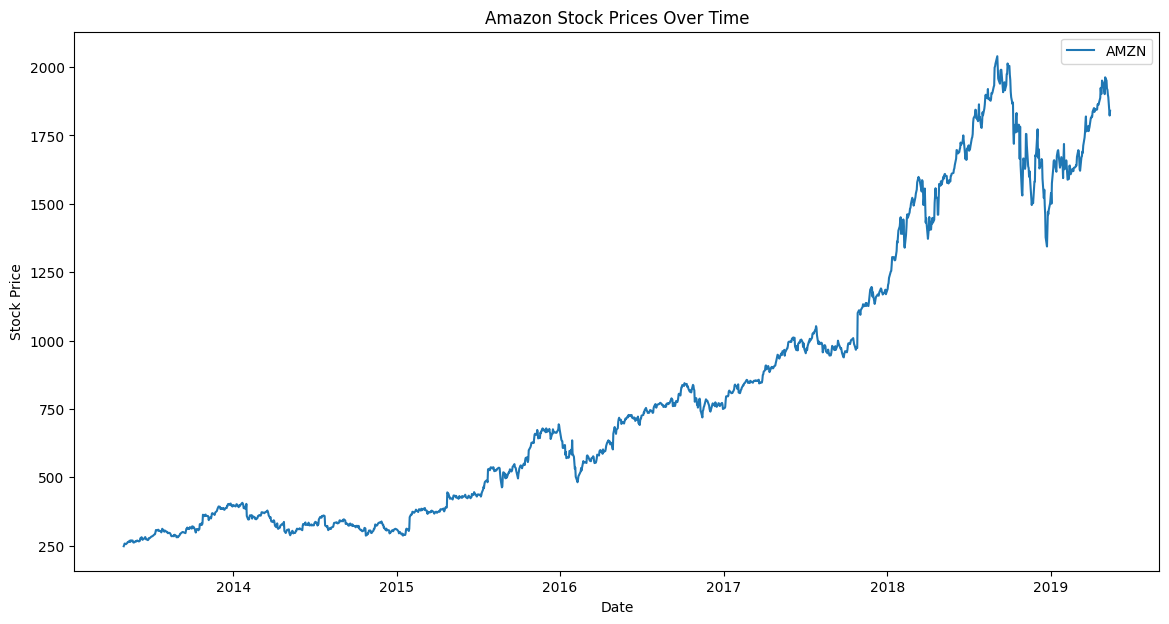

In [4]:
import matplotlib.pyplot as plt

# Plot the time series data to visualize stock price trends over time
plt.figure(figsize=(14,7))
plt.plot(df.index, df['AMZN'], label='AMZN')
plt.title('Amazon Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


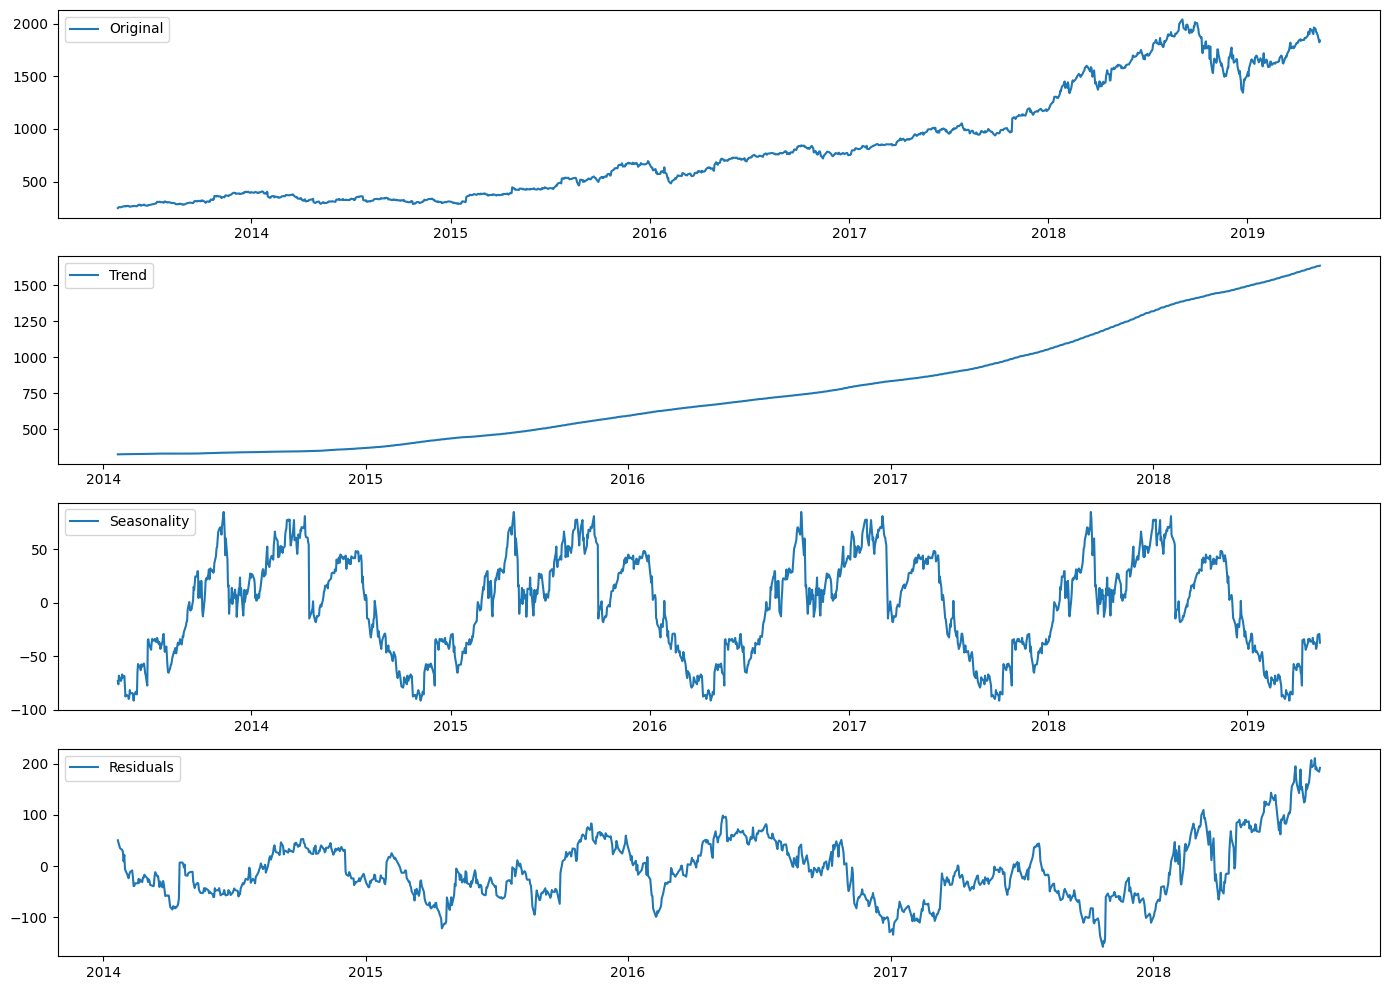

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['AMZN'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df['AMZN'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


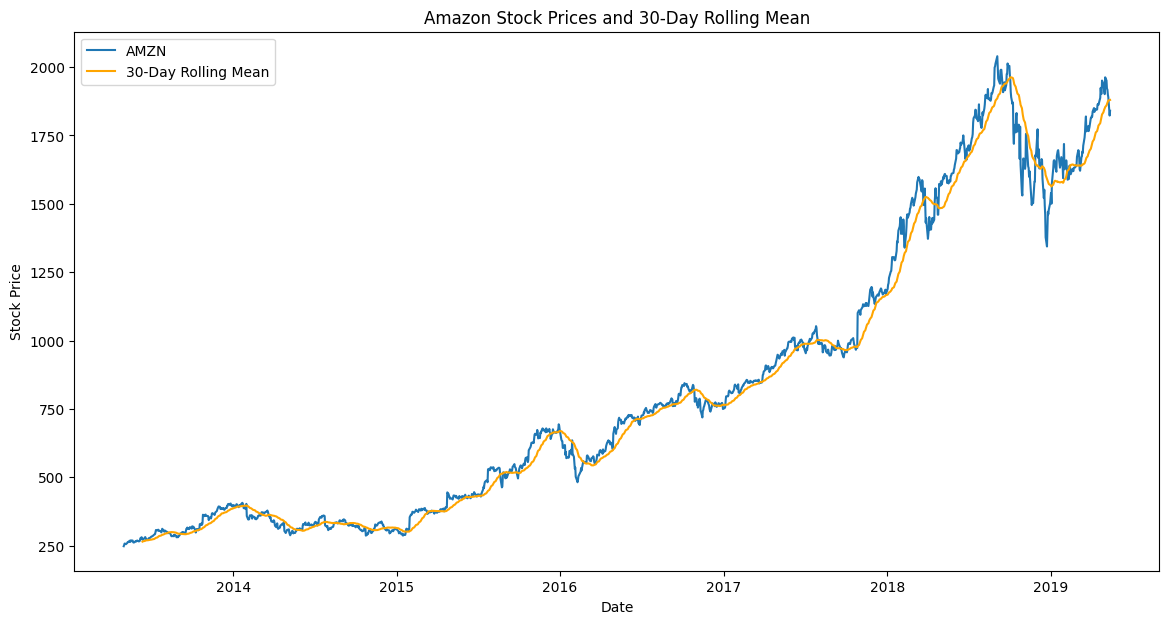

<Figure size 1400x700 with 0 Axes>

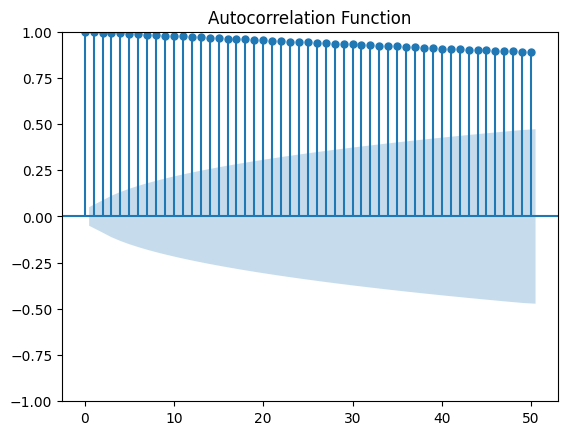

<Figure size 1400x700 with 0 Axes>

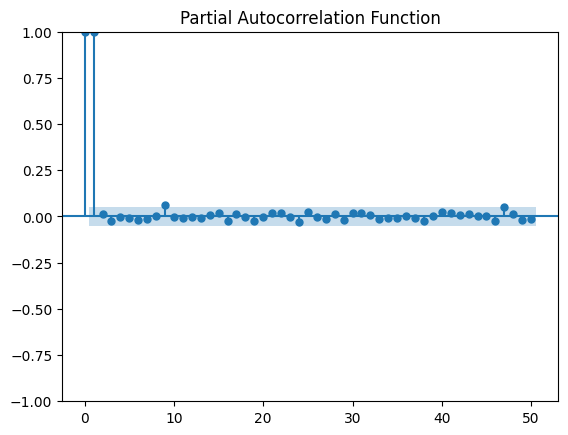

In [6]:
# Calculate and plot rolling statistics
df['Rolling_Mean'] = df['AMZN'].rolling(window=30).mean()

plt.figure(figsize=(14,7))
plt.plot(df['AMZN'], label='AMZN')
plt.plot(df['Rolling_Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('Amazon Stock Prices and 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14,7))
plot_acf(df['AMZN'].dropna(), lags=50)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(14,7))
plot_pacf(df['AMZN'].dropna(), lags=50)
plt.title('Partial Autocorrelation Function')
plt.show()
